In [24]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [25]:
dataset = pd.read_csv("Toxins5.csv")

In [26]:
dataset.shape

(137, 5)

In [27]:
dataset.head(5)

,TN,Chlorophyla,TDI,TTC,Toxicity
0,0.57,0.62,0.42,0.00,low
1,0.18,5.91,1.05,0.01,low
2,0.21,5.33,0.39,0.02,low
3,1.07,6.71,1.00,0.67,middle
4,0.36,2.59,1.07,0.18,middle


In [28]:
dataset.describe()

,TN,Chlorophyla,TDI,TTC
count,137.000000,137.000000,137.000000,137.000000
mean,0.941022,39.032774,0.780657,1.351095
std,0.800613,72.623651,0.394969,2.849098
min,0.070000,0.480000,0.000000,0.000000
25%,0.410000,5.330000,0.530000,0.030000
50%,0.730000,16.440000,0.880000,0.190000
75%,1.160000,50.480000,1.060000,0.900000
max,4.570000,690.160000,1.440000,17.190000


In [29]:
dataset.groupby("Toxicity").size()

Toxicity
high      34
low       57
middle    46
dtype: int64

In [30]:
# feature_columns = ["TN", "Chlorophyla",	"TDI",	"TTC"]
X = dataset.iloc[:,0:4].values
Y = dataset.iloc[:,4].values

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

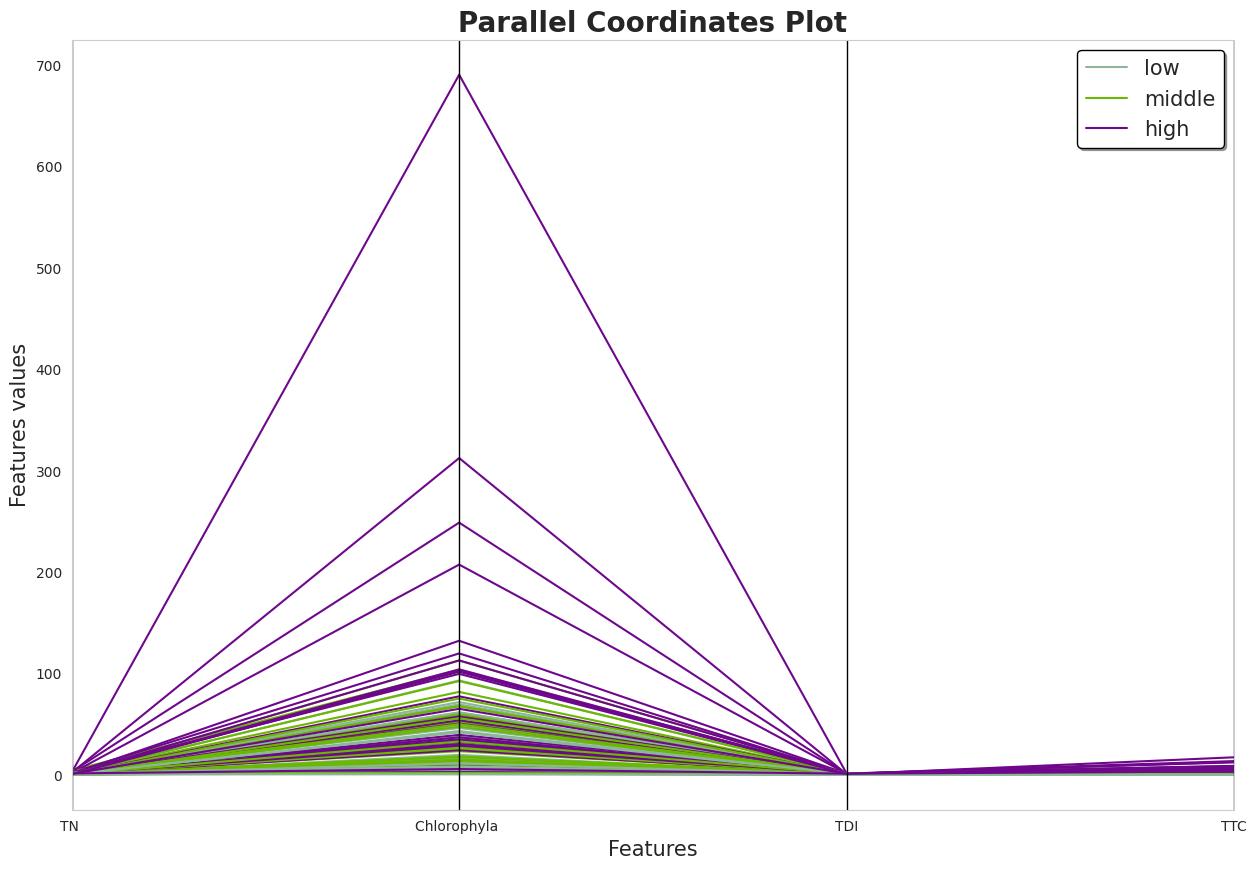

In [33]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(dataset, "Toxicity")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend (loc=1, prop={'size': 15}, frameon=True, shadow=True, facecolor="white", edgecolor="black")
plt.show()

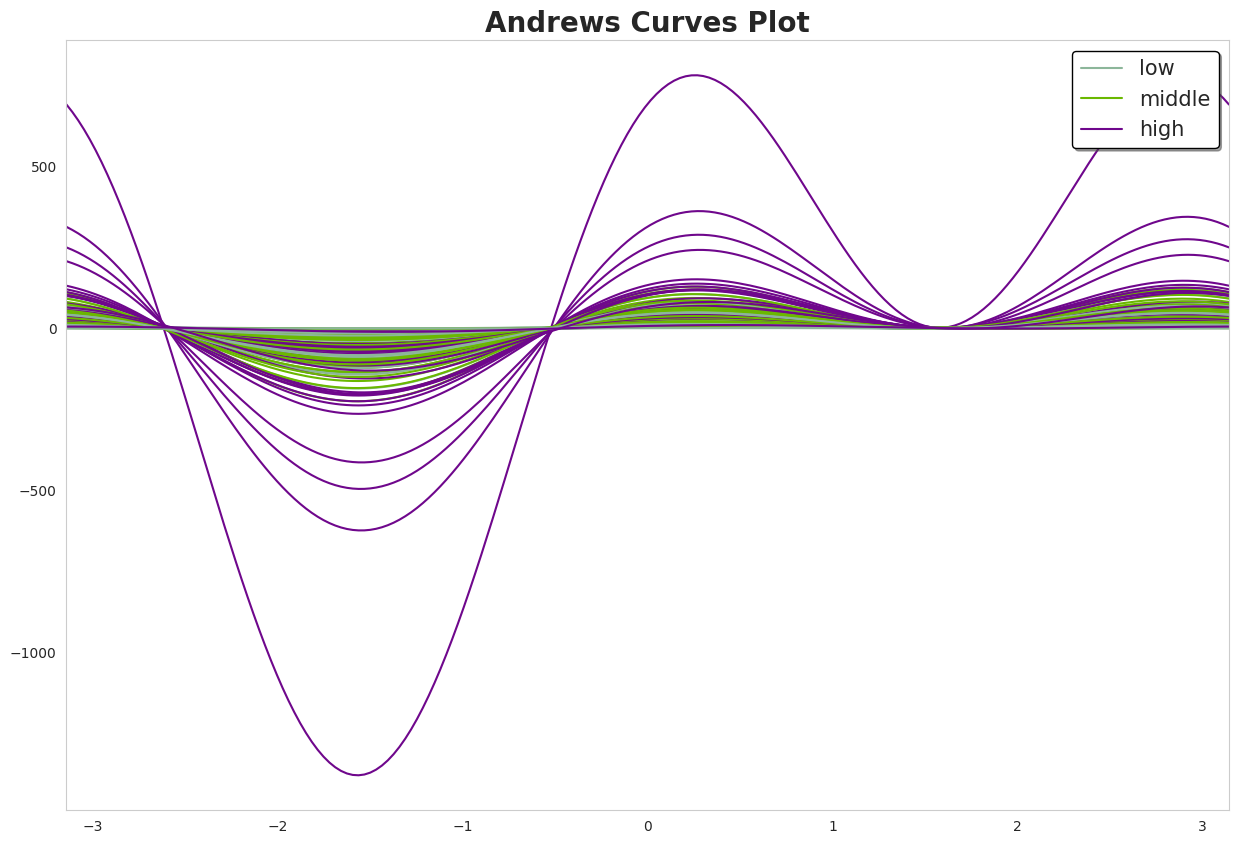

In [34]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves (dataset, "Toxicity")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend (loc=1, prop={'size': 15}, frameon=True, shadow=True, facecolor="white", edgecolor="black")
plt.show()

<Figure size 640x480 with 0 Axes>

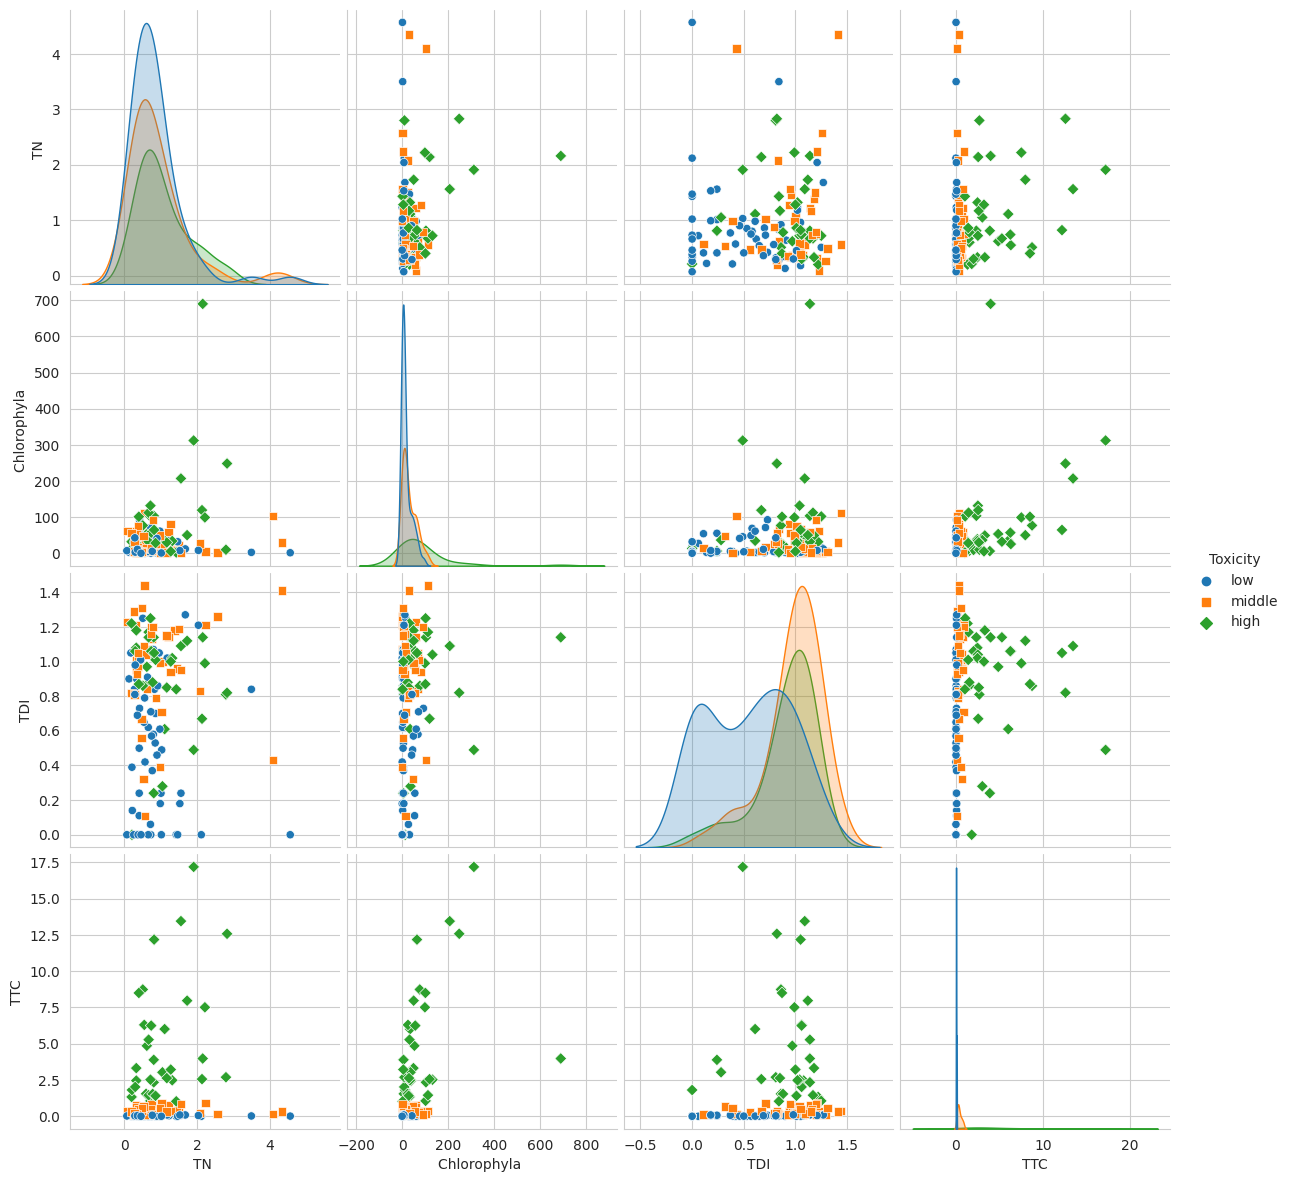

In [35]:
plt.figure()
sns.pairplot(dataset, hue = "Toxicity", height=3, markers=["o", "s", "D"])
plt.show()

<Figure size 640x480 with 0 Axes>

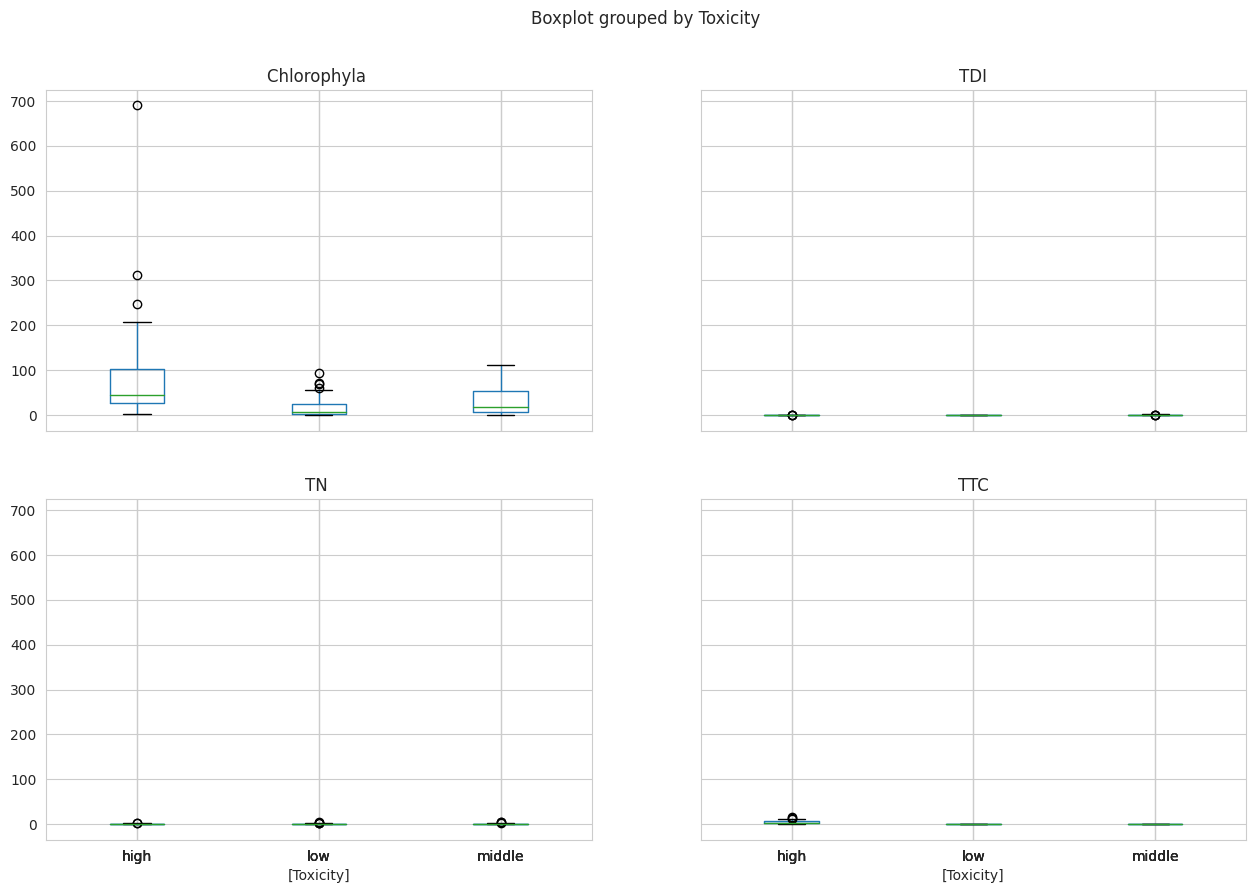

In [36]:
plt.figure()
dataset.boxplot(by="Toxicity", figsize=(15,10))
plt.show()

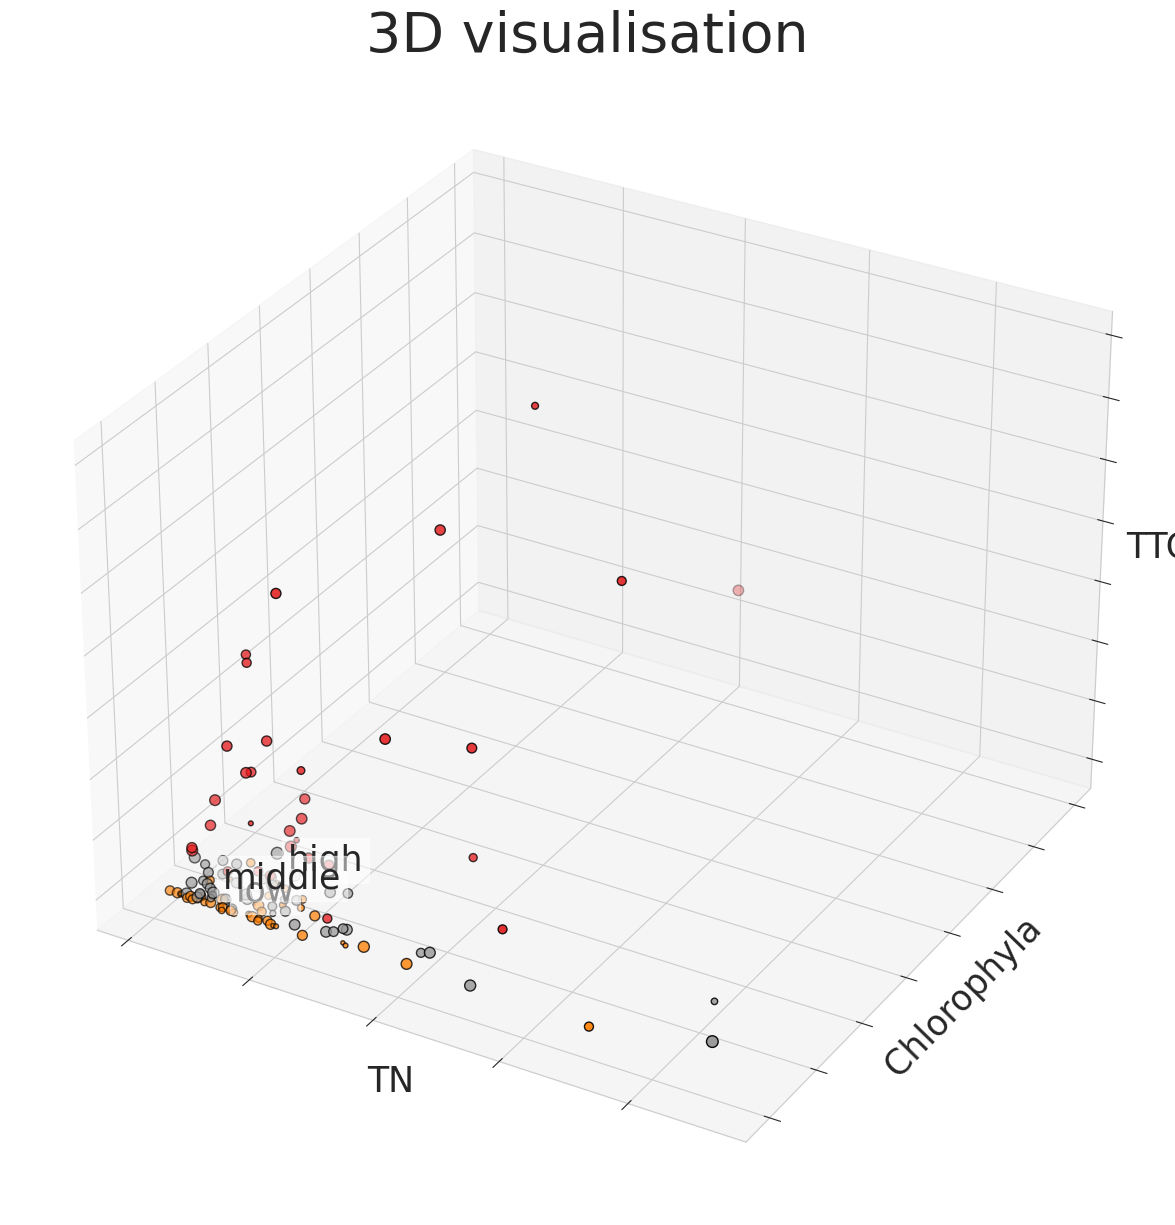

In [37]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(20,15))
ax = Axes3D(fig, elev=48, azim=134)
ax = plt.axes(projection ="3d") #IMPORTANT LINE!!!!!!!!!!
ax.scatter(X[:,0],X[:,1],X[:,3],c=Y, cmap=plt.cm.Set1, edgecolor = "k", s= X[:,2]*50)

for name, label in [('high',0),('low',1),('middle',2)]:
  ax.text3D(X[Y == label, 0].mean(),
            X[Y == label, 1].mean(),
            X[Y == label, 2].mean(), name,
            horizontalalignment='center',
            bbox=dict(alpha=.5, edgecolor = 'w', facecolor= 'w'), size=25)
  
ax.set_title("3D visualisation", fontsize=40)
ax.set_xlabel("TN", fontsize = 25)
ax.xaxis.set_ticklabels([])
ax.set_ylabel("Chlorophyla", fontsize = 25)
ax.yaxis.set_ticklabels([])
ax.set_zlabel("TTC", fontsize = 25)
ax.zaxis.set_ticklabels([])

plt.show()

In [38]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [39]:
classifier = KNeighborsClassifier(n_neighbors=3)

X_trn, X_tst, Y_trn, Y_tst = train_test_split(X,Y, test_size=0.2, random_state = 0)

classifier.fit(X_trn, Y_trn)

Y_pred = classifier.predict(X_tst)
Y_pred_trn = classifier.predict(X_trn)

In [40]:
cm = confusion_matrix(Y_tst, Y_pred)
cm

array([[4, 0, 2],
       [3, 9, 0],
       [2, 6, 2]])

In [41]:
acc = accuracy_score(Y_tst, Y_pred)*100
print('Accuracy of our model is equal '+str(round(acc,2))+' %.')

Accuracy of our model is equal 53.57 %.


In [42]:
cm2 = confusion_matrix(Y_trn, Y_pred_trn)
cm2

array([[25,  0,  3],
       [ 4, 33,  8],
       [ 5,  9, 22]])

In [43]:
acc2 = accuracy_score(Y_trn, Y_pred_trn)*100
round(acc2,2)

73.39

In [44]:
k_list = list(range(1,50,2))

cv_scores = []

for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X_trn, Y_trn, cv=10 , scoring="accuracy")
  cv_scores.append(scores.mean())

<Figure size 640x480 with 0 Axes>

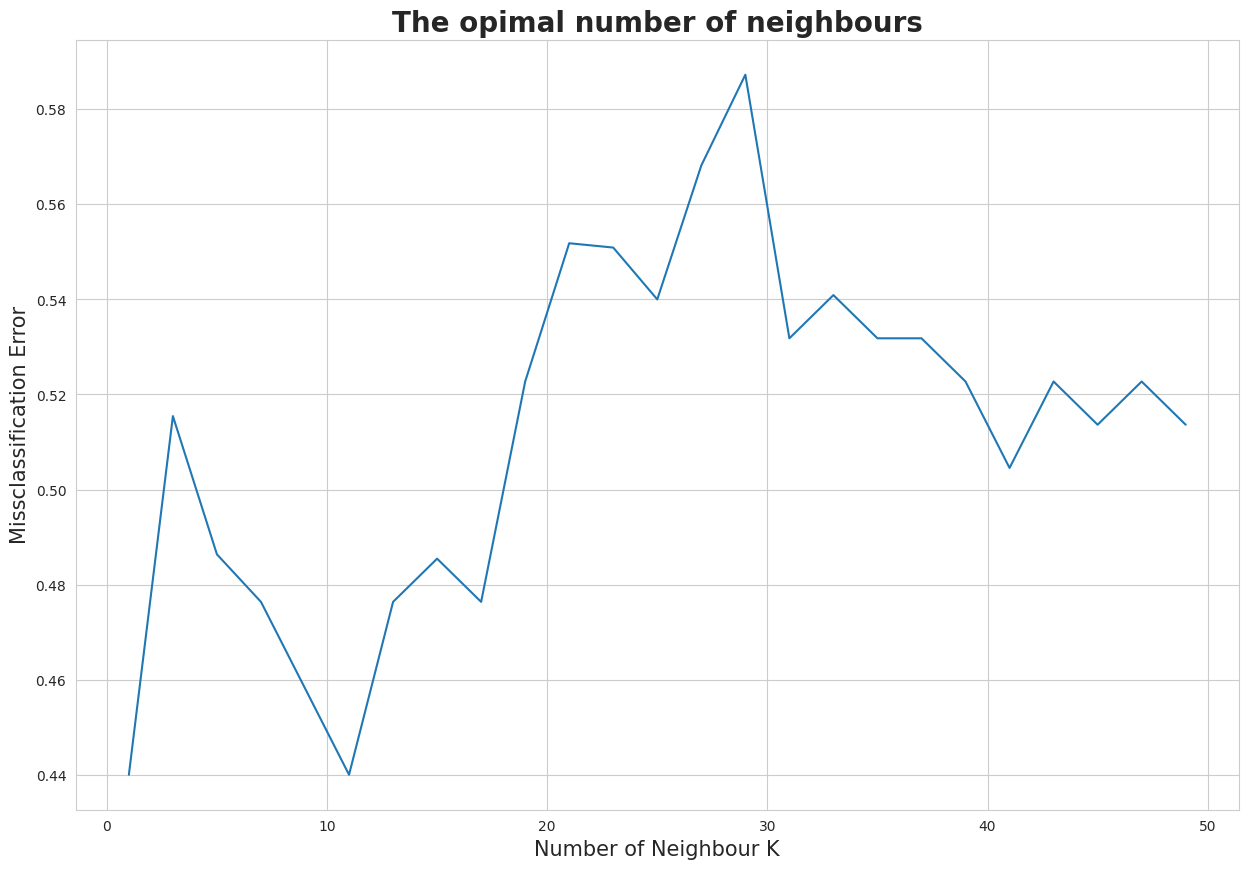

In [45]:
MSE = [1-x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title("The opimal number of neighbours", fontsize=20, fontweight = 'bold')
plt.xlabel('Number of Neighbour K', fontsize=15)
plt.ylabel('Missclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list,MSE)

plt.show()

In [46]:
best_k = k_list[MSE.index(min(MSE))]
print(f'The optimal number of neighbour is {best_k}')

The optimal number of neighbour is 1
